In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('/content/sample_data/mission 4.csv')

In [8]:
data.head()

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,Acer,Intel Core i5,16,256,17.3,macOS,1808.865225
1,Acer,Intel Core i7,32,2048,13.3,macOS,2020.923055
2,Apple,AMD Ryzen 5,32,512,17.3,Linux,1152.453189
3,HP,AMD Ryzen 5,8,512,15.6,macOS,1884.457406
4,Lenovo,AMD Ryzen 7,64,256,17.3,macOS,2780.779164


In [9]:
data.isna().sum()

,0
Brand,0
Processor Type,0
RAM Size (GB),0
Storage (GB),0
Screen Size (inches),0
Operating System,0
Price ($),0


In [10]:
data.columns

Index(['Brand', 'Processor Type', 'RAM Size (GB)', 'Storage (GB)',
       'Screen Size (inches)', 'Operating System', 'Price ($)'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
encode_cols = ['Brand', 'Processor Type', 'Operating System']
le = {}
for col in encode_cols:
  le[col] = LabelEncoder()
  data[col] = le[col].fit_transform(data[col])


In [13]:
data.head()

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,0,2,16,256,17.3,2,1808.865225
1,0,3,32,2048,13.3,2,2020.923055
2,1,0,32,512,17.3,0,1152.453189
3,3,0,8,512,15.6,2,1884.457406
4,4,1,64,256,17.3,2,2780.779164


In [14]:
scale_Cols = ['RAM Size (GB)', 'Storage (GB)', 'Screen Size (inches)']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[scale_Cols] = scaler.fit_transform(data[scale_Cols])

In [15]:
data.head()

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,0,2,-0.653598,-1.023895,1.413918,2,1808.865225
1,0,3,0.083266,1.515887,-1.146020,2,2020.923055
2,1,0,0.083266,-0.661069,1.413918,0,1152.453189
3,3,0,-1.022029,-0.661069,0.325944,2,1884.457406
4,4,1,1.556992,-1.023895,1.413918,2,2780.779164


In [16]:
data.describe()

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,1.89000,1.340000,-3.197442e-17,-2.042810e-17,1.945111e-16,1.120000,1752.871053
std,1.36373,1.116085,1.000500e+00,1.000500e+00,1.000500e+00,0.816251,671.389528
min,0.00000,0.000000,-1.022029e+00,-1.023895e+00,-1.146020e+00,0.000000,389.808247
25%,1.00000,0.000000,-7.457056e-01,-6.610691e-01,-1.146020e+00,0.000000,1233.948071
50%,2.00000,1.000000,-6.535977e-01,-6.610691e-01,3.259442e-01,1.000000,1738.449367
75%,3.00000,2.000000,1.556992e+00,1.515887e+00,1.413918e+00,2.000000,2215.303742
max,4.00000,3.000000,1.556992e+00,1.515887e+00,1.413918e+00,2.000000,3117.210896


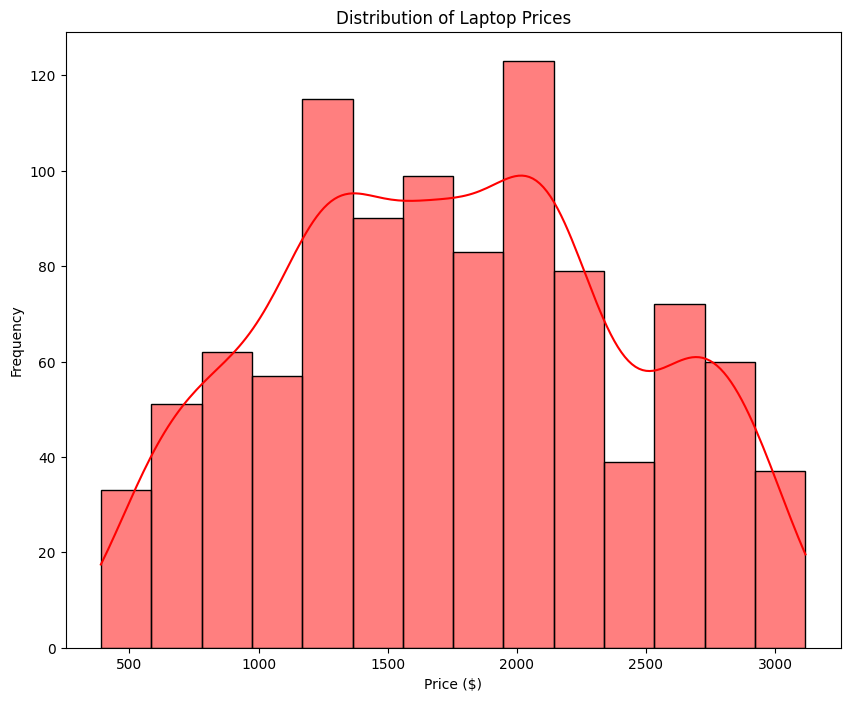

In [19]:
plt.figure(figsize=(10, 8))
sns.histplot(data['Price ($)'], kde=True, color="red")
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Laptop Prices')
plt.show()

Text(0.5, 1.0, 'RAM and Price Relationship')

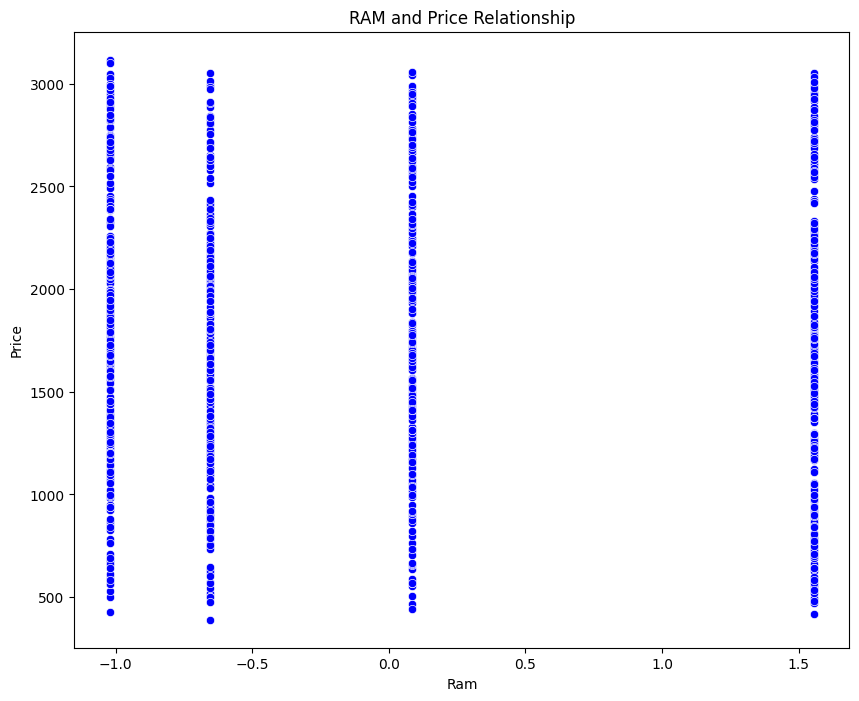

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['RAM Size (GB)'], y=data['Price ($)'], color='Blue')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('RAM and Price Relationship')


Text(0.5, 1.0, 'Brand Impact on Price ')

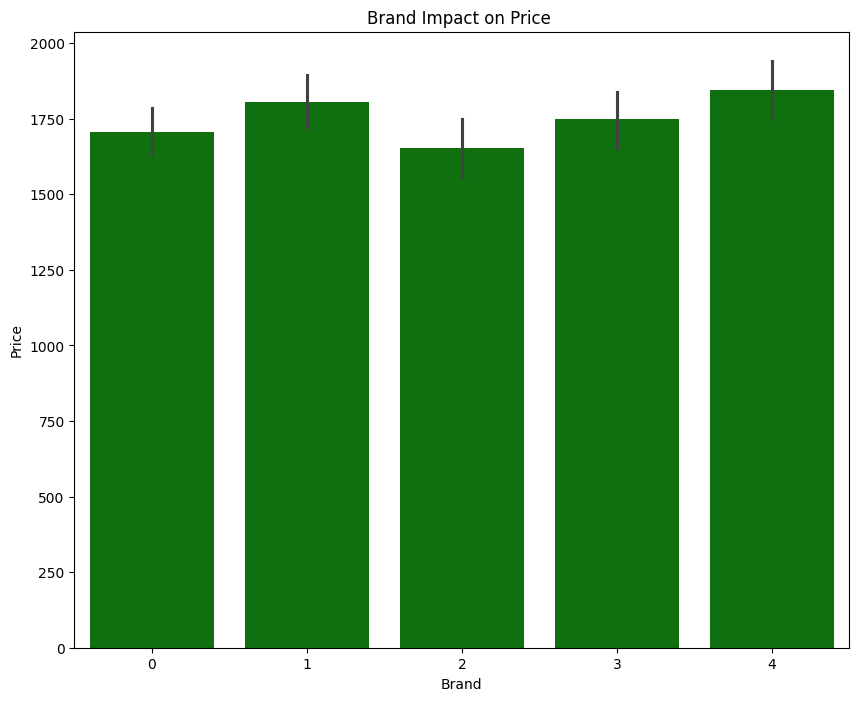

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Brand'], y=data['Price ($)'], color='Green')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Impact on Price ')

In [22]:
from sklearn.model_selection import train_test_split
x = data.drop('Price ($)', axis=1)
y = data['Price ($)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System
29,0,1,-0.653598,-1.023895,-0.698031,1
535,4,0,-0.653598,1.515887,1.413918,0
695,0,0,0.083266,1.515887,0.325944,2
557,1,3,1.556992,1.515887,-0.698031,0
836,1,1,1.556992,-0.661069,-0.698031,0
...,...,...,...,...,...,...
106,4,0,0.083266,0.064583,-1.146020,1
270,4,0,0.083266,-1.023895,1.413918,2
860,1,3,1.556992,-0.661069,-1.146020,2
435,0,2,1.556992,1.515887,1.413918,0


In [25]:
y_train

,Price ($)
29,2807.865134
535,1181.476005
695,1275.795790
557,747.523015
836,2774.574566
...,...
106,2285.394987
270,1981.674481
860,1566.686975
435,1351.000000


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)


In [29]:
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))

print("Decision Tree Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R-squared:", r2_score(y_test, y_pred_dt))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))

print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))

Linear Regression:
Mean Squared Error: 459090.8989545152
R-squared: 0.05026750906647026
Mean Absolute Error: 566.2744459316656
Decision Tree Regression:
Mean Squared Error: 574158.2116455722
R-squared: -0.18777503491768366
Mean Absolute Error: 502.8410628307085
Random Forest Regression:
Mean Squared Error: 379689.36189567775
R-squared: 0.2145273969156346
Mean Absolute Error: 464.2130240587683


In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
random_params = {
    'n_estimators': [50, 100, 200, 250,300],
    'max_depth': [None, 10, 20, 30,35,40],

}
random_model = RandomizedSearchCV(RandomForestRegressor(), random_params, cv=5)
random_model.fit(x_train, y_train)


In [33]:
print("Best Parameters:", random_model.best_params_)
print("Best Score:", random_model.best_score_)

Best Parameters: {'n_estimators': 300, 'max_depth': 10}
Best Score: 0.3227072956323328


In [34]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [49]:
import gradio as gr
def predict_laptop_price(brand, processor_type, ram_size, storage, screen, os):
  try:
    input_data = pd.DataFrame(
        {
            'Brand': [brand],
            'Processor Type': [processor_type],
            'RAM Size (GB)': [ram_size],
            'Storage (GB)': [storage],
            'Screen Size (inches)': [screen],
            'Operating System': [os]

        }
    )

    for col in encode_cols:
      input_data[col] = le[col].transform(input_data[col])
    input_data[scale_Cols] = scaler.transform(input_data[scale_Cols])
    prediction = random_model.best_estimator_.predict(input_data)
    return prediction[0]
  except Exception as e:
    return str(e)
gr.Interface(
      inputs=[
          gr.Dropdown(choices=list(data['Brand'].unique()), label='Brand'),
          gr.Dropdown(choices=list(data['Processor Type'].unique()), label='Processor Type'),
          gr.Number(label='RAM Size (GB)'),
          gr.Number(label='Storage (GB)'),
          gr.Number(label='Screen Size (inches)'),
          gr.Dropdown(choices=list(data['Operating System'].unique()), label='Operating System')
      ]
      , outputs=gr.Textbox(label='Predicted Price ($)'),
      fn=predict_laptop_price,
      title='Laptop Price Prediction',
      description='Enter the details of the laptop to predict its price.'
  ).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://780f9f0b14c28fdedf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [37]:
data['Brand'].unique()

array(['Acer', 'Apple', 'HP', 'Lenovo', 'Dell'], dtype=object)